In [1]:
%pip install fastbook
from fastbook import *

You should consider upgrading via the '/home/paperspace/fastai_venv/bin/python3 -m pip install --upgrade pip' command.


In [2]:
urls = search_images_ddg("bird_photos", max_images = 1)
print(urls[0])
dest = Path("bird.jpg")
if not dest.exists():
  download_url(urls[0], dest)

In [3]:
searches = 'forest', 'bird'
path = Path('bird_or_not')

if not path.exists():
  path.mkdir()
  for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photos')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [4]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

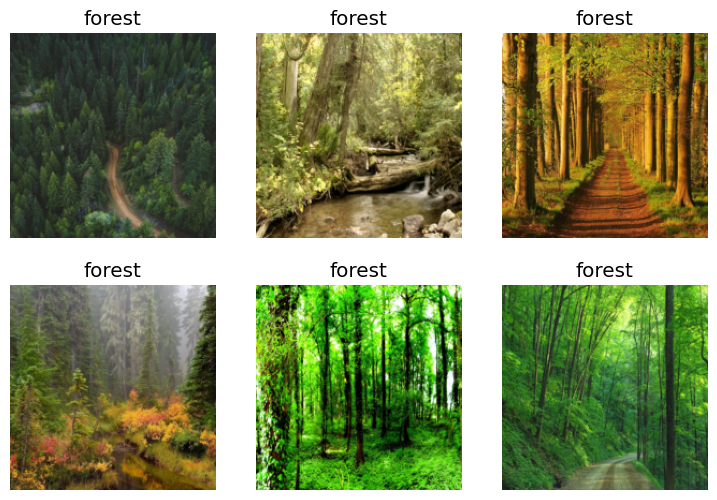

In [5]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
    ).dataloaders(path)

dls.show_batch(max_n=6)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [7]:
is_bird, _, probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}")
print(f"Probability that it's a bird: {probs[0]:.4f}")

This is a: bird
Probability that it's a bird: 1.0000
